Import Libraries

In [46]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx
import random
from helpers import createPaper, getCommNodes, splitCommunity, genGraphFeatures

Define initial parameters

In [47]:
# define time steps
timeSteps = 30

# Probabilities
# probability that you generate new author
probNewAuthor = 0.5
# probability that you stop at a given node
probStop = 0.7
# probability that a split event occurs
pd = 0.5

# define initial scholars, will be in form (id, scholarField, color)
scholarField = 0
nodeID = 0


Create Model

In [48]:
network = nx.Graph()
network.add_node(nodeID, label=scholarField, color="red")
fields = []
# go through time steps, add new scholar and paper at each step
for i in range(1, timeSteps):

    # Choose first author, either new scholar or random choice
    currNodes = list(network.nodes())
    authors = [random.choice(currNodes)]

    # with probability, add new author to network set as main author with a coauthor
    if random.random() < probNewAuthor:
        # generate author and field
        nodeID += 1
        author = nodeID

        # generate random coauthor from currNodes,
        coauthorID = random.choice(currNodes)

        # add node with field being the co-author's field
        scholarField = network.nodes[coauthorID]["label"]
        network.add_node(author, label=scholarField, color="red")
        network.add_edge(author, coauthorID, weight=1, width=1)
        if scholarField not in fields:
            fields.append(scholarField) 

        # update authors list
        authors = [author, coauthorID]

    # Add new paper, calling function
    createPaper(network, authors, probStop)

    # split random discipline with prob pd
    if random.random() < pd:
        commNodes = getCommNodes(network, random.choice(fields))
        splitCommunity(network, commNodes)

Display Network

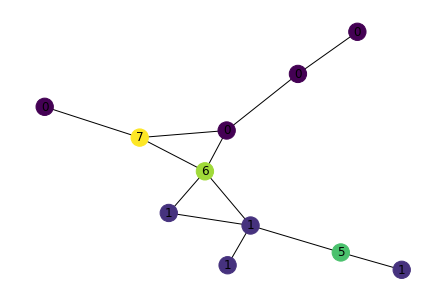

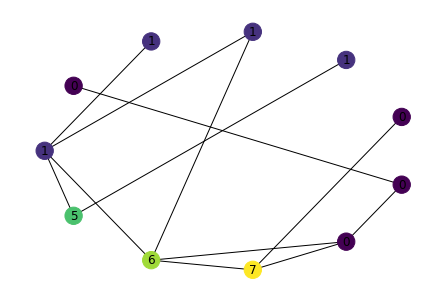

In [49]:
nodeLabels, nodeColors = genGraphFeatures(network)
# spring layout
pos = nx.spring_layout(network, seed=3068)  # Seed layout for reproducibility
nx.draw(network, pos=pos, with_labels=True, labels=nodeLabels, node_color=nodeColors)
plt.show()

# shell layout
pos = nx.shell_layout(network)  # Seed layout for reproducibility
nx.draw(network, pos=pos, with_labels=True, labels=nodeLabels, node_color=nodeColors)
plt.show()

In [50]:
nt = Network()
# populates the nodes and edges data structures
nt.from_nx(network)
nt.show('docs/models/modularity.html')